<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_XMatch_With_GAIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries 

In [ ]:
!pip install mpl-scatter-density

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Libraries

In [ ]:
%matplotlib inline

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

# Gaia DR3 Data

By using a query presented in the article, I add data here. All filters mentioned in section 2 are applied by conditions that were added to the SQL script. Although I tried hard to select more stars, I could not select more than 80,000 stars.



In [ ]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [ ]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighb

## Extracting and Selecting Data from Gaia

LPV

In [ ]:
job_LPV = Gaia.launch_job_async("SELECT TOP 100 * FROM gaiadr3.vari_long_period_variable", dump_to_file=True)
print (job_LPV)

Jobid: 1674682904251O
Phase: COMPLETED
Owner: None
Output file: 1674682904251O-result.vot.gz
Results: None


In [ ]:
Gaia_data_LPV = job_LPV.get_results()
Gaia_data_LPV = pd.DataFrame(np.array(Gaia_data_LPV))
Gaia_data_LPV

,solution_id,source_id,frequency,frequency_error,amplitude,median_delta_wl_rp,is_cstar
0,375316653866487564,5238325118488689280,NaN,NaN,NaN,5.684,False
1,375316653866487564,5238329035499337472,0.004098,0.001836,0.023915,-2.535,False
2,375316653866487564,5238330203730394880,NaN,NaN,NaN,NaN,False
3,375316653866487564,5238331195847435520,0.002232,0.000902,0.109918,6.154,False
4,375316653866487564,5238331715558948992,NaN,NaN,NaN,6.082,False
...,...,...,...,...,...,...,...
95,375316653866487564,5238593880360358784,0.005091,0.000251,0.465617,6.082,False
96,375316653866487564,5238595628389483264,NaN,NaN,NaN,5.174,False
97,375316653866487564,5238596285542106752,0.001897,0.003228,0.035843,-2.927,False
98,375316653866487564,5238597281974466432,0.002303,0.001127,0.102773,5.686,False


ALL STARS

In [ ]:
%%time
job_all = Gaia.launch_job_async("SELECT TOP 80000  ra, dec, parallax, \
parallax_error, pm, pmra, pmra_error, pmdec, pmdec_error, ruwe, bp_rp, phot_g_mean_mag AS mg FROM gaiadr3.gaia_source  \
WHERE RA > 296.1875 \
AND RA < 296.4375 \
AND DEC > -14.9611 \
AND DEC < -14.6333", dump_to_file=True) 

print (job_all)

Jobid: 1674682818631O
Phase: COMPLETED
Owner: None
Output file: 1674682818631O-result.vot.gz
Results: None
CPU times: user 53.6 ms, sys: 8.08 ms, total: 61.7 ms
Wall time: 4.34 s


In [ ]:
Gaia_data_all = job_all.get_results()
Gaia_data_all = pd.DataFrame(np.array(Gaia_data_all))
Gaia_data_all

,ra,dec,parallax,parallax_error,pm,pmra,pmra_error,pmdec,pmdec_error,ruwe,bp_rp,mg
0,296.187541,-14.840697,1.803900,0.691225,7.159717,-1.193200,0.742336,-7.059590,0.627823,1.038215,1.251320,20.216280
1,296.187544,-14.853109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.844244,20.958399
2,296.187547,-14.844723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.754848,20.722399
3,296.187587,-14.686593,0.187937,0.226175,3.700168,3.441480,0.245884,1.359214,0.204471,1.005660,1.235918,18.939501
4,296.187635,-14.933667,0.668574,0.209932,6.408688,-2.518896,0.240746,-5.892914,0.184804,1.050635,1.445040,18.680454
...,...,...,...,...,...,...,...,...,...,...,...,...
8049,296.437271,-14.796904,0.894454,1.423073,27.730888,-20.635802,1.477056,-18.524735,1.345259,1.090351,1.882256,20.589766
8050,296.437403,-14.872685,0.239862,0.083148,2.956683,2.953811,0.087804,0.130289,0.076112,1.035838,0.904377,17.051252
8051,296.437425,-14.961009,0.364389,1.000456,3.059903,1.073929,1.239958,-2.865254,1.128873,1.018626,1.253168,20.480236
8052,296.437453,-14.637772,0.206094,0.242033,7.791264,-3.852283,0.259062,-6.772275,0.209518,0.989124,1.105412,18.533907


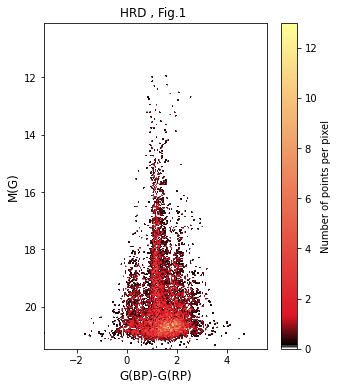

In [ ]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Gaia_data_all['bp_rp']
Y = Gaia_data_all['mg']
using_mpl_scatter_density(fig, X , Y )
plt.title("HRD , Fig.1 " ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_Fig_1' , dpi=300)
plt.show()

INNER JOIN : LPV and ALL STARS

In [ ]:
job = Gaia.launch_job_async("SELECT ra ,dec ,pm , pmra, pmra, pmra_error, pmdec,\
pmdec_error, parallax, parallax_error, parallax_over_error, ruwe \
FROM gaiadr3.gaia_source GDR INNER JOIN gaiadr3.vari_long_period_variable GLPV ON GDR.source_id = GLPV.source_id \
WHERE RA > 296.1875 \
AND RA < 296.4375 \
AND DEC > -14.9611 \
AND DEC < -14.6333 ", dump_to_file=True) 
print(job)

Jobid: 1674683010594O
Phase: COMPLETED
Owner: None
Output file: 1674683010594O-result.vot.gz
Results: None


In [ ]:
Gaia_data = job.get_results()
Gaia_data = pd.DataFrame(np.array(Gaia_data))
Gaia_data

,ra,dec,pm,pmra,pmra_2,pmra_error,pmdec,pmdec_error,parallax,parallax_error,parallax_over_error,ruwe
0,296.190620,-14.872717,0.170090,-0.040656,-0.040656,0.070719,-0.165160,0.058196,-0.013389,0.063340,-0.211386,1.080137
1,296.199160,-14.848072,0.075734,-0.057716,-0.057716,0.091311,-0.049036,0.071125,-0.070052,0.085187,-0.822333,0.949651
2,296.204197,-14.742654,0.436700,0.293702,0.293702,0.316629,-0.323181,0.228666,-0.104140,0.233708,-0.445599,1.106096
3,296.208109,-14.726077,0.098997,-0.059223,-0.059223,0.088559,-0.079329,0.070911,-0.147812,0.082526,-1.791083,1.002683
4,296.212874,-14.732164,0.116194,0.075955,0.075955,0.076767,0.087931,0.059063,-0.040593,0.071694,-0.566195,0.980358
5,296.227242,-14.857690,0.193856,-0.036499,-0.036499,0.048780,-0.190389,0.039787,0.006499,0.044040,0.147573,0.967094
6,296.232096,-14.865551,0.052612,-0.049412,-0.049412,0.048508,-0.018069,0.039162,-0.077250,0.044153,-1.749607,0.973341
7,296.232383,-14.758401,0.142640,0.074379,0.074379,0.155047,-0.121713,0.138351,-0.317075,0.132658,-2.390169,0.961239
8,296.238801,-14.822388,0.064041,-0.055013,-0.055013,0.056644,-0.032784,0.043802,-0.131519,0.052319,-2.513780,1.050831
9,296.242319,-14.749008,0.222228,-0.126362,-0.126362,0.098842,-0.182805,0.079566,-0.035415,0.090736,-0.390308,1.027135


# NGC6822 Data

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 137 (delta 12), reused 3 (delta 3), pack-reused 106
Receiving objects: 100% (137/137), 2.29 MiB | 6.54 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
NGC6822_data = pd.read_csv("/content/NGC_6822/Data/final_cleaned_data.csv")
NGC6822_data

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,1,10870.0,296.178920,-14.822860,17.520,0.04,16.530,0.04,16.190,0.05,S
1,2,10784.0,296.215450,-14.834690,17.450,0.03,16.530,0.04,16.200,0.06,S
2,3,11004.0,296.273410,-14.808610,17.600,0.03,16.620,0.03,16.270,0.05,S
3,4,11029.0,296.283080,-14.804970,17.460,0.03,16.550,0.02,16.220,0.05,S
4,5,12050.0,296.254270,-14.817640,18.170,0.07,17.250,0.10,16.700,0.05,S
...,...,...,...,...,...,...,...,...,...,...,...
380,381,NaN,296.003693,-14.974893,18.392,NaN,17.560,NaN,17.210,NaN,C
381,382,NaN,297.181274,-14.445981,18.530,NaN,18.264,NaN,17.292,NaN,C
382,383,NaN,297.108337,-14.493650,18.191,NaN,17.383,NaN,16.661,NaN,C
383,384,NaN,297.013916,-14.348797,18.201,NaN,17.552,NaN,16.944,NaN,C


#X_Match

##Final data with spitzer

In [ ]:
Main_cat = NGC6822_data
Scnd_cat = Gaia_data 

In [ ]:
Main_cat

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,1,10870.0,296.178920,-14.822860,17.520,0.04,16.530,0.04,16.190,0.05,S
1,2,10784.0,296.215450,-14.834690,17.450,0.03,16.530,0.04,16.200,0.06,S
2,3,11004.0,296.273410,-14.808610,17.600,0.03,16.620,0.03,16.270,0.05,S
3,4,11029.0,296.283080,-14.804970,17.460,0.03,16.550,0.02,16.220,0.05,S
4,5,12050.0,296.254270,-14.817640,18.170,0.07,17.250,0.10,16.700,0.05,S
...,...,...,...,...,...,...,...,...,...,...,...
380,381,NaN,296.003693,-14.974893,18.392,NaN,17.560,NaN,17.210,NaN,C
381,382,NaN,297.181274,-14.445981,18.530,NaN,18.264,NaN,17.292,NaN,C
382,383,NaN,297.108337,-14.493650,18.191,NaN,17.383,NaN,16.661,NaN,C
383,384,NaN,297.013916,-14.348797,18.201,NaN,17.552,NaN,16.944,NaN,C


In [ ]:
Scnd_cat

,ra,dec,pm,pmra,pmra_2,pmra_error,pmdec,pmdec_error,parallax,parallax_error,parallax_over_error,ruwe
0,296.190620,-14.872717,0.170090,-0.040656,-0.040656,0.070719,-0.165160,0.058196,-0.013389,0.063340,-0.211386,1.080137
1,296.199160,-14.848072,0.075734,-0.057716,-0.057716,0.091311,-0.049036,0.071125,-0.070052,0.085187,-0.822333,0.949651
2,296.204197,-14.742654,0.436700,0.293702,0.293702,0.316629,-0.323181,0.228666,-0.104140,0.233708,-0.445599,1.106096
3,296.208109,-14.726077,0.098997,-0.059223,-0.059223,0.088559,-0.079329,0.070911,-0.147812,0.082526,-1.791083,1.002683
4,296.212874,-14.732164,0.116194,0.075955,0.075955,0.076767,0.087931,0.059063,-0.040593,0.071694,-0.566195,0.980358
5,296.227242,-14.857690,0.193856,-0.036499,-0.036499,0.048780,-0.190389,0.039787,0.006499,0.044040,0.147573,0.967094
6,296.232096,-14.865551,0.052612,-0.049412,-0.049412,0.048508,-0.018069,0.039162,-0.077250,0.044153,-1.749607,0.973341
7,296.232383,-14.758401,0.142640,0.074379,0.074379,0.155047,-0.121713,0.138351,-0.317075,0.132658,-2.390169,0.961239
8,296.238801,-14.822388,0.064041,-0.055013,-0.055013,0.056644,-0.032784,0.043802,-0.131519,0.052319,-2.513780,1.050831
9,296.242319,-14.749008,0.222228,-0.126362,-0.126362,0.098842,-0.182805,0.079566,-0.035415,0.090736,-0.390308,1.027135


In [ ]:
Main_cat_Coord = SkyCoord(Main_cat['Ra(J2000) deg'], Main_cat['Dec(J2000) deg'], unit=(u.deg, u.deg))
Scnd_cat_Coord = SkyCoord(Scnd_cat['ra'], Scnd_cat['dec'], unit=(u.deg, u.deg))

In [ ]:
idx, d2D, d3D = Scnd_cat_Coord.match_to_catalog_sky(Main_cat_Coord)

In [ ]:
max_sep = 1.0 * u.arcsec        # Maximum erorr
i_OK = d2D < max_sep

In [ ]:
Secondary_catalog = Scnd_cat[i_OK]
Main_catalog = Main_cat.iloc[idx[i_OK]]

Making CSV file 

In [ ]:
Secondary_catalog.to_csv(r'Secondary_catalog.csv', header=True, index=None, sep='\t', mode='w')
Main_catalog.to_csv(r'Main_catalog.csv', header=True, index=None, sep='\t', mode='w')

In [ ]:
with open("Main_catalog.csv") as f1, open("Secondary_catalog.csv") as f2, open("X_Catalog.csv", "w") as f3:
     for x, y in zip(f1, f2):
          f3.write(x.strip() + '\t' + y.strip() + '\n')
f1.close()
f2.close()
f3.close()

In [ ]:
X_data = pd.read_csv ("X_Catalog.csv", sep = '\t')
X_data

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,...,pm,pmra,pmra_2,pmra_error,pmdec,pmdec_error,parallax,parallax_error,parallax_over_error,ruwe
0,41,40139.0,296.20428,-14.74271,15.25,NaN,14.32,NaN,13.92,NaN,...,0.436700,0.293702,0.293702,0.316629,-0.323181,0.228666,-0.104140,0.233708,-0.445599,1.106096
1,45,20004.0,296.21293,-14.73224,13.72,NaN,12.97,NaN,12.57,NaN,...,0.116194,0.075955,0.075955,0.076767,0.087931,0.059063,-0.040593,0.071694,-0.566195,0.980359
